# Check Bylot forcing files

Downloaded from https://nordicana.cen.ulaval.ca/dpage.aspx?doi=45693CE-02685A5200DD4C38 the 06/02/2024 by Mickaël Lalande

- Article (Domine et al., 2021) : https://essd.copernicus.org/articles/13/4331/2021/
- Données : https://nordicana.cen.ulaval.ca/dpage.aspx?doi=45693CE-02685A5200DD4C38

CLASSIC forcing: https://cccma.gitlab.io/classic/basicInputs.html

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

In [2]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all'

## Bylot Island, Canadian high Arctic

In [4]:
df = pd.read_csv(path+'/Bylot/Bylot_driving_dataV2.csv', parse_dates=['DATE'], dayfirst=True, index_col=['DATE'])
ds = df.to_xarray()
df

,WindSpeed m/s,0=Data; 1=Gap-filled,Air Temp. °C,Relative Humidity,Specific humidity g/kg,Long Wave Downwell. CNR4 W m-2,0=CNR4; 1=Modified ERA,Long Wave Downwell. ERA5 W m-2,Short Wave downwell. CNR4 W m-2,0=CNR4; 1=Modified ERA,Short Wave downwell. ERA5 W m-2,Pressure kPa,Precip. Total mm/h,Precip. Rain,Precip. Snow,Precip season cumul
DATE,,,,,,,,,,,,,,,,
2013-07-11 09:00:00,1.530,0,6.819953,91.18,5.6257,308.859,0,298.371,250.90,0,354.711,100.188543,0.0,0.0,0.0,0.000000
2013-07-11 10:00:00,1.405,0,6.957644,89.27,5.5593,299.669,0,289.269,310.49,0,419.291,100.198543,0.0,0.0,0.0,0.000000
2013-07-11 11:00:00,2.021,0,8.925269,90.20,6.4263,289.596,0,278.748,672.70,0,490.762,100.198543,0.0,0.0,0.0,0.000000
2013-07-11 12:00:00,2.559,0,10.422386,89.57,7.0594,280.483,0,267.848,370.67,0,569.034,100.198543,0.0,0.0,0.0,0.000000
2013-07-11 13:00:00,2.749,0,8.218802,88.42,6.0033,283.789,0,257.987,372.92,0,589.216,100.198543,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-25 06:00:00,0.713,0,11.119000,63.97,5.2158,245.120,0,206.344,343.93,0,359.763,101.345000,0.0,0.0,0.0,20.503224
2019-06-25 07:00:00,0.908,0,10.895000,64.35,5.1667,259.830,0,207.897,419.45,0,436.212,101.390000,0.0,0.0,0.0,20.503224
2019-06-25 08:00:00,2.065,0,10.744000,62.69,4.9798,251.450,0,210.618,516.75,0,514.440,101.440000,0.0,0.0,0.0,20.503224


<AxesSubplot:xlabel='DATE'>

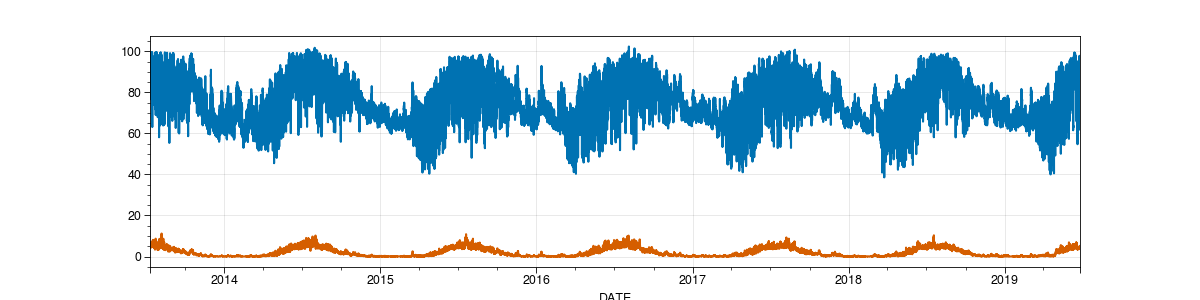

In [6]:
%matplotlib widget
df['Relative Humidity'].plot(figsize=(12,3))
df['Specific humidity g/kg'].plot()

3.3 Specific humidity


Many models use specific humidity rather than RH relative to water as input variable, and we therefore also provide that variable in grams of water per kilogram of moist air. To calculate the partial pressure of water vapor, we used Eq. (17) of Huang (2018). We used PV = nRT for the gas equation of state, where P is pressure, V the volume considered, n the number of moles in V, R the gas constant and T temperature. Values used in the calculations are 18.01528 g for the molar mass of water, 8.3145 J K−1 mol−1 for R and 28.9647 g for the molar mass of dry air. The humidity time series are shown in Fig. 2.

- https://planetcalc.com/2167/
- https://planetcalc.com/2161/
- https://en.wikipedia.org/wiki/Density_of_air
- https://earthscience.stackexchange.com/questions/2360/how-do-i-convert-specific-humidity-to-relative-humidity

In [378]:
def compute_es(T, method='Huang2018', water_only=False):
    """
        Compute the saturation vapor pressure [Pa] from the air temperature [°C].
        Use improved formulas for negative and positive temperatures.

        Parameters
        ----------
        T : float, pandas.core.series.Series
            Air temperature [°C].

        method : str, optional
            Method to compute the saturation vapor pressure. Default is 'Huang2018'. 
            Options are:

            - 'Huang2018': https://journals.ametsoc.org/view/journals/apme/57/6/jamc-d-17-0334.1.xml
            - 'Magnus'   : most commonly used simple formulas for the saturation vapor pressure

        water_only : bool, optional.  
            Activate or not the computation for water/ice separately. Default is False 
            (i.e., the computation is done for water and ice separately).

        Returns
        -------
        es : float, pandas.core.series.Series
            Saturation vapor pressure [Pa]
    """ 

    # Compute the saturation vapor pressure for the water and the ice
    if method == 'Huang2018':
        es_water = np.exp( 34.494 - 4924.99 / (T + 237.1) ) / (T + 105)**1.57
        es_ice = np.exp( 43.494 - 6545.8 / (T + 278) ) / (T + 868)**2

    elif method == 'Magnus':
        es_water = 610.94*np.exp( 17.625*T / (T + 243.04) )
        es_ice = 611.21*np.exp( 22.587*T / (T + 273.86) )

    else:
        raise ValueError('The method '+method+' is not supported. Options are: Huang2018 or Magnus.')

    # Merge them depending on the type
    if type(T) == pd.core.series.Series: 
        es_tot = es_water.where(T > 0, other=es_ice)
    elif isinstance(T, int) or isinstance(T, float):
        if T > 0: es_tot = es_water
        else: es_tot = es_ice
    else:
        raise TypeError('The type '+str(type(t))+' is not supported.')

    if water_only == False:
        return es_tot
    else:
        return es_water


def compute_e(T, RH, method='Huang2018', water_only=False):
    """
        Compute the vapor pressure [Pa] from the air temperature [°C] and relative humidity [%].
        See compute_es for more information.
    """ 
    return RH/100*compute_es(T, method=method, water_only=water_only)


def rho_humid_air(T, RH, P, method='Huang2018', water_only=False):
    """
        Compute the density of humid air [kg m$^{-3}$] from the air temperature [°C], relative humidity [%],
        and atmospheric pressure [Pa]. See compute_es for more information.
    """ 
    Md = 28.965*1e-3 # Molecular molar mass of dry air [kg mol$^{-1}$]
    Mv = 18.0153*1e-3 # Molecular molar mass of water [kg mol$^{-1}$]
    R = 8.31446 # Molar gas constant [J K$^{-1}$ mol$^{-1}$]

    pv = compute_e(T, RH, method=method, water_only=water_only) # vapor pressure [Pa]
    pd = P - pv # dry air pressure [Pa]
    
    return (pd*Md + pv*Mv)/(R*(T+273.15))

def RH2AH(T, RH, method='Huang2018', water_only=False):
    '''
        Convert relative humidity [%] to absolute humidity [kg m^{-3}] from the air temperature [°C] 
        and relative humidity [%]. See compute_es for more information.

        Absolute humidity: mass of water in the unit volume
    '''
    e = compute_e(T, RH, method=method, water_only=water_only) # vapor pressure [Pa]
    Mv = 18.0153*1e-3 # Molecular molar mass of water [kg mol$^{-1}$]
    R = 8.31446 # Molar gas constant [J K$^{-1}$ mol$^{-1}$]
    
    return e*Mv/(R*(T+273.15))

def RH2SH(T, RH, P, method='Huang2018', water_only=False):
    '''
        Convert relative humidity [%] to specific humidity [kg kg^{-1}] from the air temperature [°C],
        relative humidity [%], and atmospheric pressure [hPa]. See compute_es for more information.

        Relative humidity: mass of water in total mass of air

        Note: alternatively the specific humidity can be computed directly from the mass of vapor (mv)
        and dry air (md) as q = mv / (md + mv)
    '''
    a = RH2AH(T, RH, method=method, water_only=water_only) # absolute humidity [kg m^{-3}]
    rho = rho_humid_air(T, RH, P, method=method, water_only=water_only) # density of humid air [kg m$^{-3}$]
    
    return a/rho

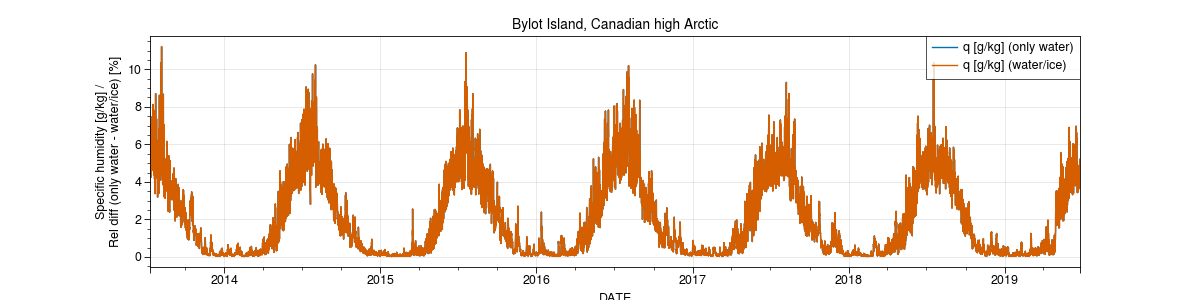

In [379]:
%matplotlib widget

df['Specific humidity g/kg'].plot(figsize=(12,3), label='q [g/kg] (only water)', lw=1)

q_water_only = RH2SH(df['Air Temp. °C'], df['Relative Humidity'], df['Pressure kPa']*1e3, method='Huang2018', water_only=True)*1e3
q_water_ice = RH2SH(df['Air Temp. °C'], df['Relative Humidity'], df['Pressure kPa']*1e3, method='Huang2018', water_only=False)*1e3
               
q_water_only.plot(label='q [g/kg] (water/ice)', lw=1)
# ( (q_water_only - q_water_ice)/q_water_ice*100 ).plot(label='q [g/kg] (water/ice)', lw=1, ls='--', color='gray', alpha=0.8)
               
plt.ylabel('Specific humidity [g/kg] /\nRel diff (only water - water/ice) [%]')
plt.title('Bylot Island, Canadian high Arctic')
# plt.xlim('2015-08', '2016-07')
plt.legend()

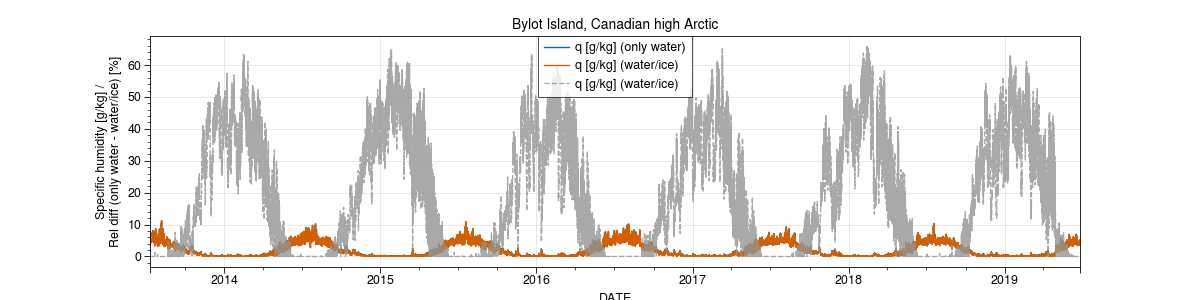

In [374]:
%matplotlib widget

df['Specific humidity g/kg'].plot(figsize=(12,3), label='q [g/kg] (only water)', lw=1)

q_water_only = RH2SH(df['Air Temp. °C'], df['Relative Humidity'], df['Pressure kPa']*1e3, method='Huang2018', water_only=True)*1e3
q_water_ice = RH2SH(df['Air Temp. °C'], df['Relative Humidity'], df['Pressure kPa']*1e3, method='Huang2018', water_only=False)*1e3
               
q_water_ice.plot(label='q [g/kg] (water/ice)', lw=1)
( (q_water_only - q_water_ice)/q_water_ice*100 ).plot(label='q [g/kg] (water/ice)', lw=1, ls='--', color='gray', alpha=0.8)
               
plt.ylabel('Specific humidity [g/kg] /\nRel diff (only water - water/ice) [%]')
plt.title('Bylot Island, Canadian high Arctic')
# plt.xlim('2015-08', '2016-07')
plt.legend()

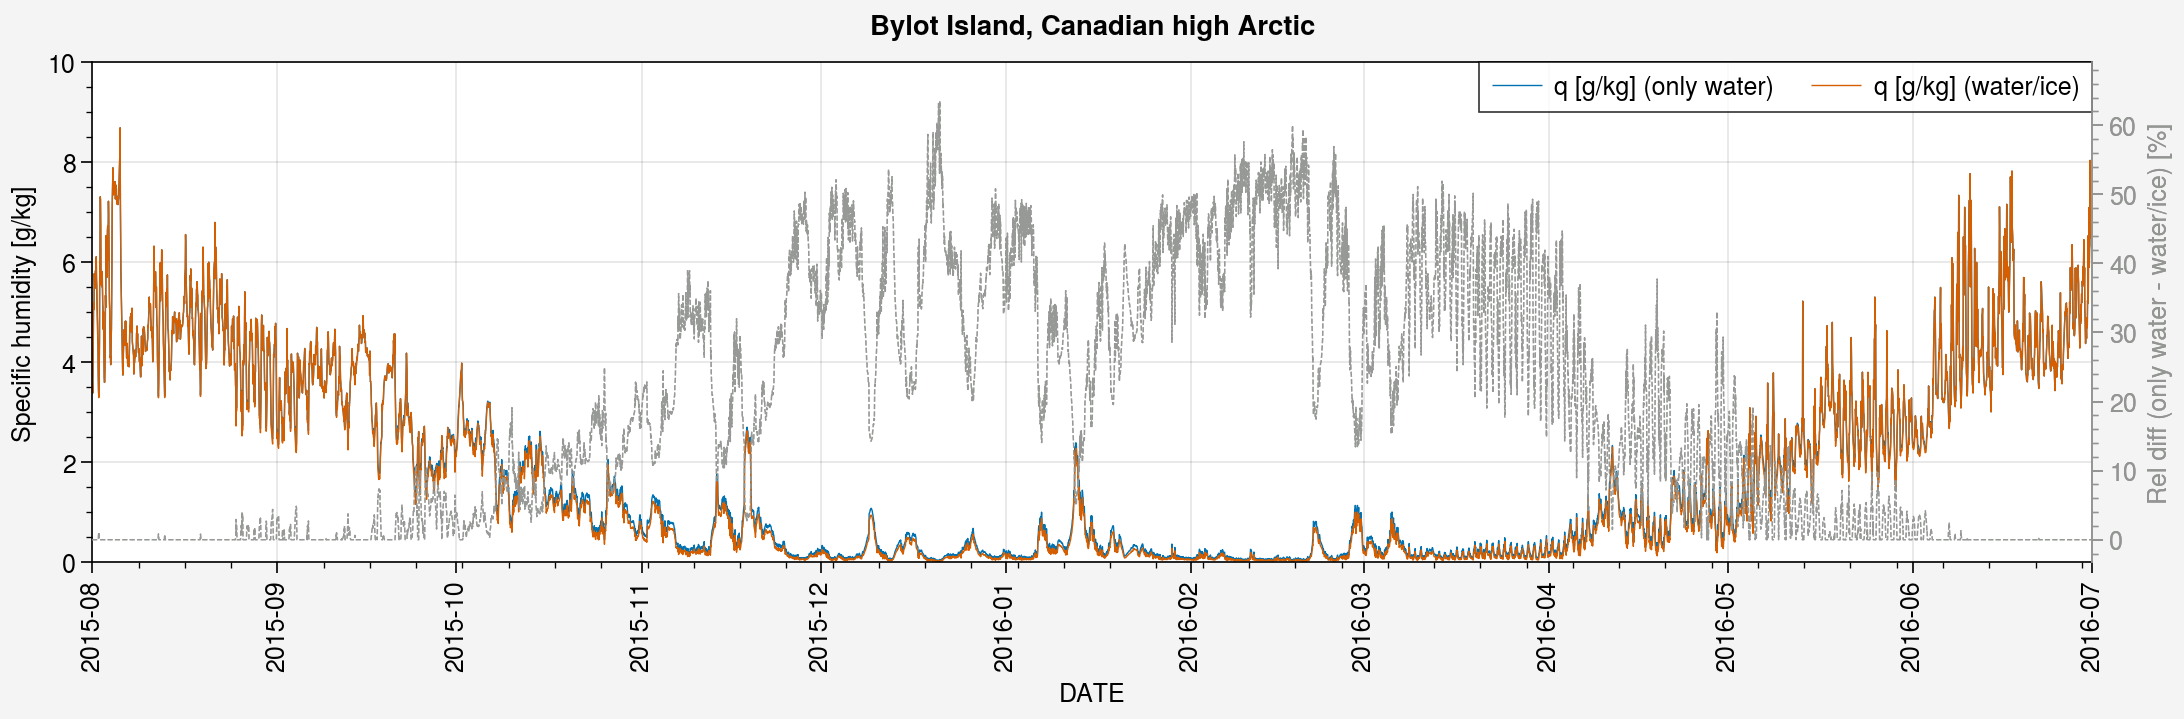

In [377]:
%matplotlib inline

fig, axs = pplt.subplots(refwidth=10, refaspect=4)
# axs[0].plot(df['Specific humidity g/kg'], label='q [g/kg] (only water)', lw=1)

q_water_only = RH2SH(df['Air Temp. °C'], df['Relative Humidity'], df['Pressure kPa']*1e3, method='Huang2018', water_only=True)*1e3
q_water_ice = RH2SH(df['Air Temp. °C'], df['Relative Humidity'], df['Pressure kPa']*1e3, method='Huang2018', water_only=False)*1e3
               
axs[0].plot(q_water_only, label='q [g/kg] (only water)', lw=0.5)
axs[0].plot(q_water_ice, label='q [g/kg] (water/ice)', lw=0.5)

ox = axs[0].alty(color='gray', label='Rel diff (only water - water/ice) [%]')
ox.plot((q_water_only - q_water_ice)/q_water_ice*100 , label='q [g/kg] (water/ice)', lw=0.5, ls='--', color='gray', alpha=0.8)

axs[0].format(
    ylabel='Specific humidity [g/kg]',
    xlim=(pd.to_datetime('2015-08'), pd.to_datetime('2016-07')),
    ylim=(0, 10)
)
axs[0].legend()
fig.suptitle('Bylot Island, Canadian high Arctic')
fig.save('q_water_ice_bylot_2015_2016.pdf')

<AxesSubplot:xlabel='DATE'>

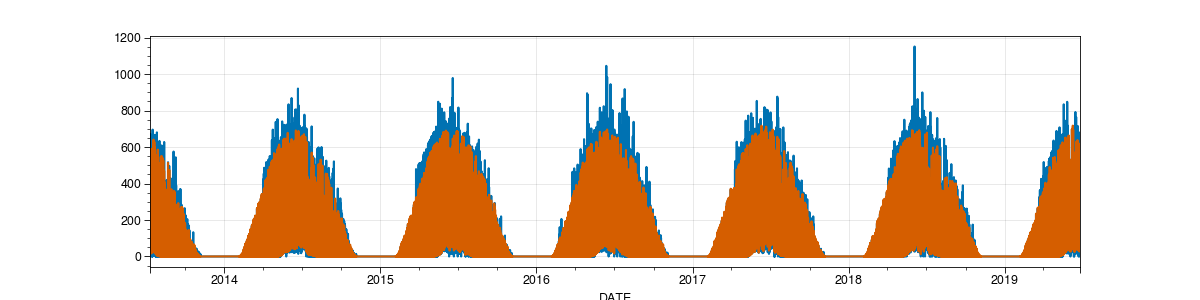

In [4]:
%matplotlib widget
df['Short Wave downwell. CNR4 W m-2'].plot(figsize=(12,3))
df['Short Wave downwell. ERA5 W m-2'].plot()

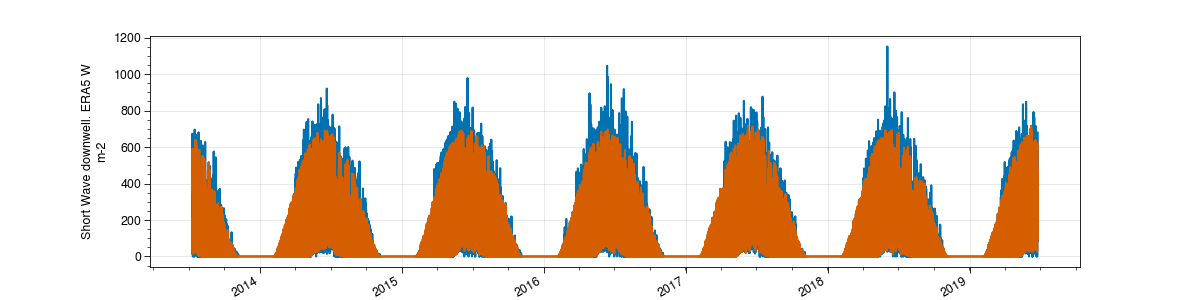

In [91]:
%matplotlib widget
ds['Short Wave downwell. CNR4 W m-2'].plot(figsize=(12,3))
ds['Short Wave downwell. ERA5 W m-2'].plot()

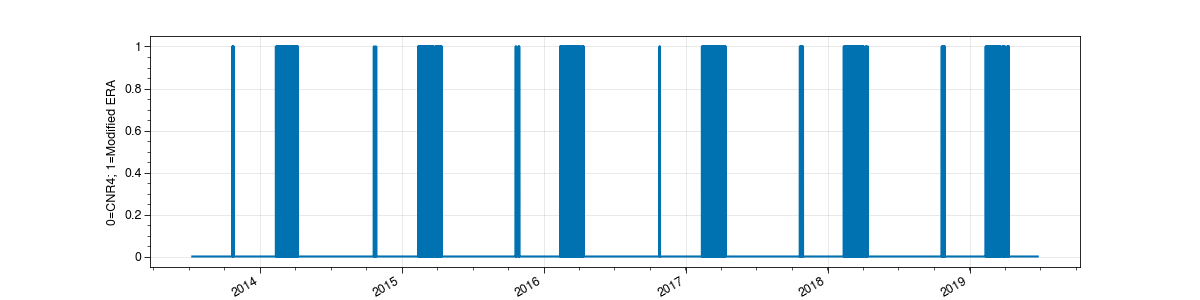

In [6]:
%matplotlib widget
ds['0=CNR4; 1=Modified ERA'].plot(figsize=(12,3))

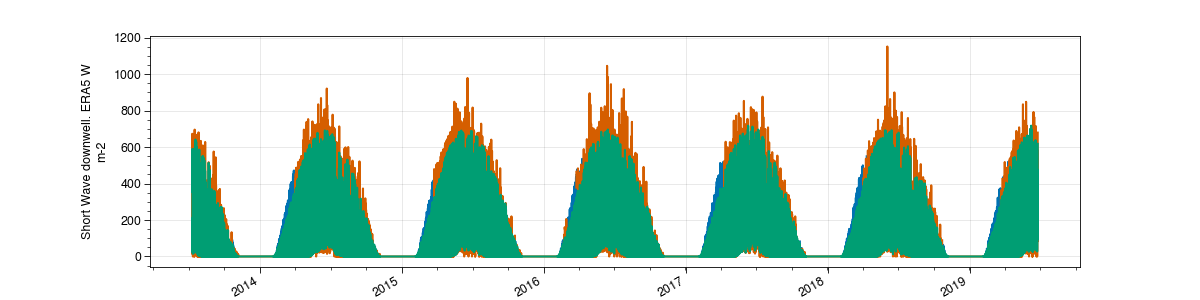

In [74]:
%matplotlib widget
(ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 1)*1.4).plot(figsize=(12,3))
ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0).plot()
# (1.4*ds['Short Wave downwell. ERA5 W m-2']).plot()
ds['Short Wave downwell. ERA5 W m-2'].plot()

In [30]:
ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0)

<xarray.DataArray 'Short Wave downwell. CNR4 W m-2' (DATE: 52202)>
array([250.9 , 310.49, 672.7 , ..., 516.75, 580.81, 679.  ])
Coordinates:
  * DATE     (DATE) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00

In [32]:
def SWdown_pred(SWdown, a, b):
    return SWdown*a + b

def mse(x, y):
    return ((x - y)**2).mean().values.item(0)

In [34]:
np.sqrt(mse(ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0),
   ds['Short Wave downwell. ERA5 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0)))

56.638340319767465

In [53]:
import scipy.optimize as optimize

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b = params # <-- for readability you may wish to assign names to the component variables
    metric = mse(
        ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0),
        a*ds['Short Wave downwell. ERA5 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0)+b
    )
    return metric

initial_guess = [1.4, 10]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = {:0.3f}'.format(np.sqrt(result.fun)))
    print(fitted_params)
else:
    raise ValueError(result.message)

RMSE = 56.620
[ 0.99703099 -1.0647502 ]


In [64]:
ds.DATE.dt.month

<xarray.DataArray 'month' (DATE: 52202)>
array([7, 7, 7, ..., 6, 6, 6])
Coordinates:
  * DATE     (DATE) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00

In [61]:
ds['DATE.month']

<xarray.DataArray 'month' (DATE: 52202)>
array([7, 7, 7, ..., 6, 6, 6])
Coordinates:
  * DATE     (DATE) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00

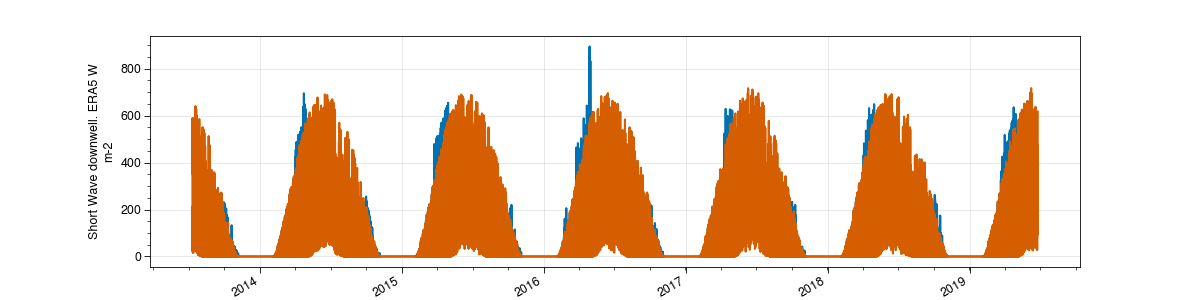

In [85]:
%matplotlib widget
ds['Short Wave downwell. CNR4 W m-2'].where(ds.DATE.dt.month.isin([10, 11, 12, 1, 2, 3, 4])).plot(figsize=(12,3))
ds['Short Wave downwell. ERA5 W m-2'].plot()

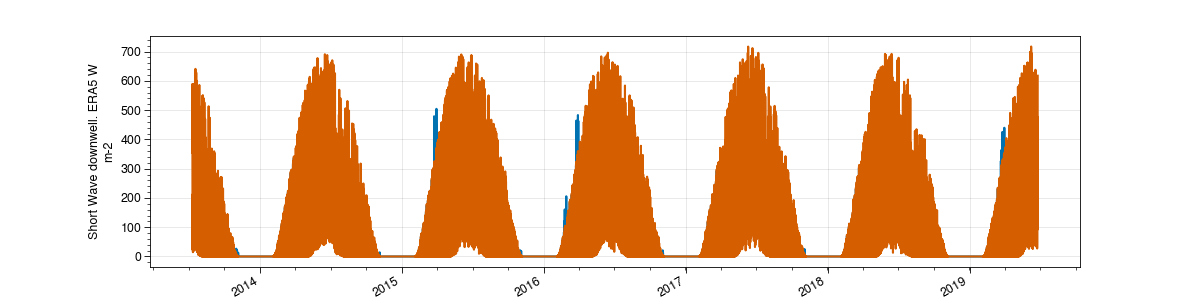

In [88]:
%matplotlib widget
ds['Short Wave downwell. CNR4 W m-2'].where(ds.DATE.dt.month.isin([11, 12, 1, 2, 3])).plot(figsize=(12,3))
ds['Short Wave downwell. ERA5 W m-2'].plot()

In [83]:
import scipy.optimize as optimize

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b = params # <-- for readability you may wish to assign names to the component variables
    metric = mse(
        ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0).where(ds.DATE.dt.month.isin([11, 12, 1, 2, 3])),
        a*ds['Short Wave downwell. ERA5 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0).where(ds.DATE.dt.month.isin([11, 12, 1, 2, 3]))+b
    )
    return metric

initial_guess = [1.4, 10]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = {:0.3f}'.format(np.sqrt(result.fun)))
    print(fitted_params)
else:
    raise ValueError(result.message)

RMSE = 4.376
[ 1.29529763 -0.14228177]


In [87]:
import scipy.optimize as optimize

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b = params # <-- for readability you may wish to assign names to the component variables
    metric = mse(
        ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0).where(ds.DATE.dt.month.isin([10, 11, 12, 1, 2, 3, 4])),
        a*ds['Short Wave downwell. ERA5 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0).where(ds.DATE.dt.month.isin([10, 11, 12, 1, 2, 3, 4]))+b
    )
    return metric

initial_guess = [1.4, 10]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = {:0.3f}'.format(np.sqrt(result.fun)))
    print(fitted_params)
else:
    raise ValueError(result.message)

RMSE = 19.868
[1.14006738 0.13996618]


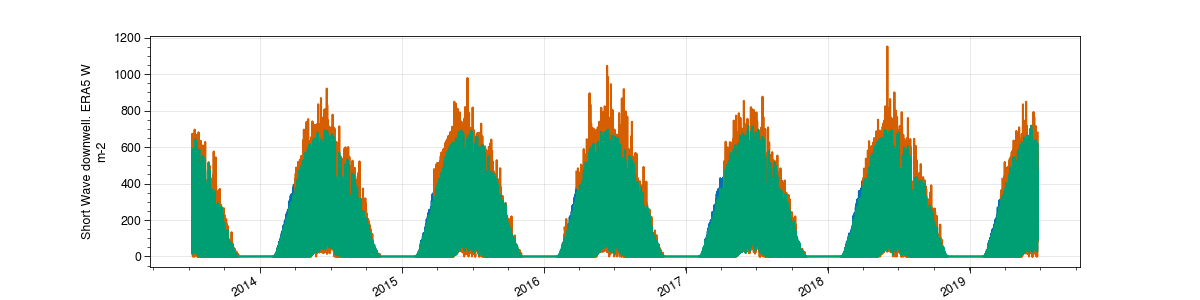

In [75]:
%matplotlib widget
(ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 1)*1.17).plot(figsize=(12,3))
ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0).plot()
# (1.4*ds['Short Wave downwell. ERA5 W m-2']).plot()
ds['Short Wave downwell. ERA5 W m-2'].plot()

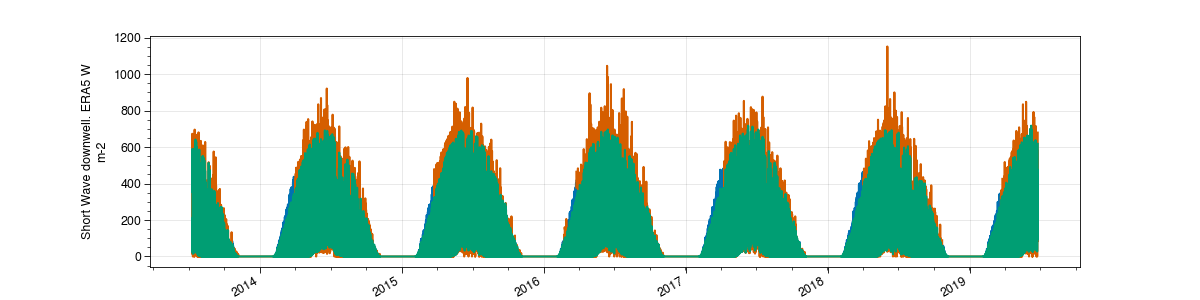

In [89]:
%matplotlib widget
(ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 1)*1.3).plot(figsize=(12,3))
ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0).plot()
# (1.4*ds['Short Wave downwell. ERA5 W m-2']).plot()
ds['Short Wave downwell. ERA5 W m-2'].plot()

In [48]:
np.sqrt(mse(
    ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0),
    1.4*ds['Short Wave downwell. ERA5 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0)+0
))

97.47908448910296

In [39]:
fitted_params[0]

0.9970310127393671

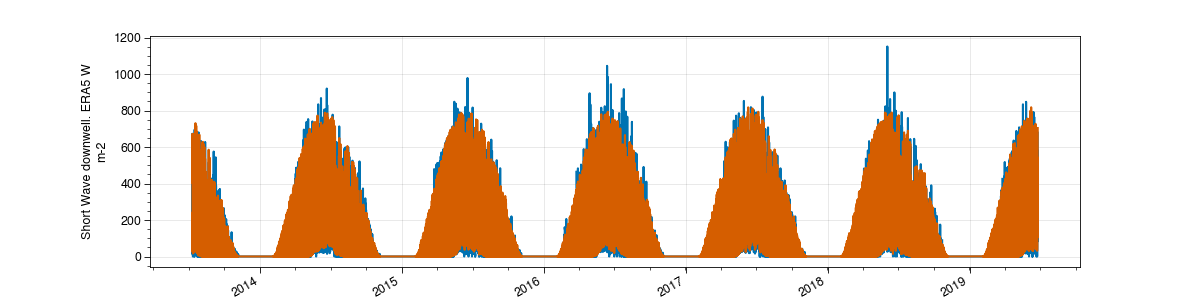

In [92]:
%matplotlib widget
# (ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 1)*1.4).plot(figsize=(12,3))
ds['Short Wave downwell. CNR4 W m-2'].where(ds['0=CNR4; 1=Modified ERA'] == 0).plot(figsize=(12,3))
(fitted_params[0]*ds['Short Wave downwell. ERA5 W m-2']+fitted_params[1]).plot()

In [ ]:
import scipy.optimize as optimize

def f(params):
    zstd_0, m2 = params
    w = scf.copy(); w[:] = weights
    mse = u.weighted_rmse(scf.sel(time=train_period), LA22(sd.sel(time=train_period), 0.01, swe.sel(time=train_period)/sd.sel(time=train_period)*1000, 50, 1, topo_std, zstd_0, m2), w)**2  
    return mse

initial_guess = [3e-4, 2]
result = optimize.minimize(f, initial_guess, method='nelder-mead')
if result.success:
    fitted_params = result.x
    print(fitted_params)
    print('MSE = {:0.3f}'.format(result.fun) + ' / RMSE = {:0.3f}'.format(np.sqrt(result.fun)) + ' ({:0.1f} %)'.format(np.sqrt(result.fun)*100))
else:
    raise ValueError(result.message)

In [ ]:
SW↓CNR4 = SW↓ERA5 × 0.9956 − 3.7033 W m−2

In [10]:
ds_val

<xarray.Dataset>
Dimensions:                               (Date: 52202)
Coordinates:
  * Date                                  (Date) datetime64[ns] 2013-07-11T09...
Data variables: (12/27)
    Snow depth m                          (Date) float64 0.0 0.0 0.0 ... 0.0 0.0
    Long Wave Upwelling radiation W m-2   (Date) float64 360.5 363.3 ... 386.9
     0=CNR4; 1=From IR120                 (Date) int64 1 1 1 1 1 1 ... 0 0 0 0 0
    Short Wave Upwelling radiation W m-2  (Date) float64 41.77 48.95 ... 114.1
    Albedo                                (Date) float64 0.16 0.15 ... 0.16 0.16
     0=CNR4; 1=SW down modified ERA5      (Date) int64 0 0 0 0 0 0 ... 0 0 0 0 0
    ...                                    ...
    Snow Temp.  37 cm                     (Date) float64 nan nan nan ... nan nan
    Snow Temp.  0 cm                      (Date) float64 nan nan nan ... nan nan
    Snow Temp.  5 cm                      (Date) float64 nan nan nan ... nan nan
    Snow Temp.  15 cm                     (Date) float64 nan nan nan ... nan nan
    Snow Temp.  25 cm                     (Date) float64 nan nan nan ... nan nan
    Snow Temp.  35 cm                     (Date) float64 nan nan nan ... nan nan

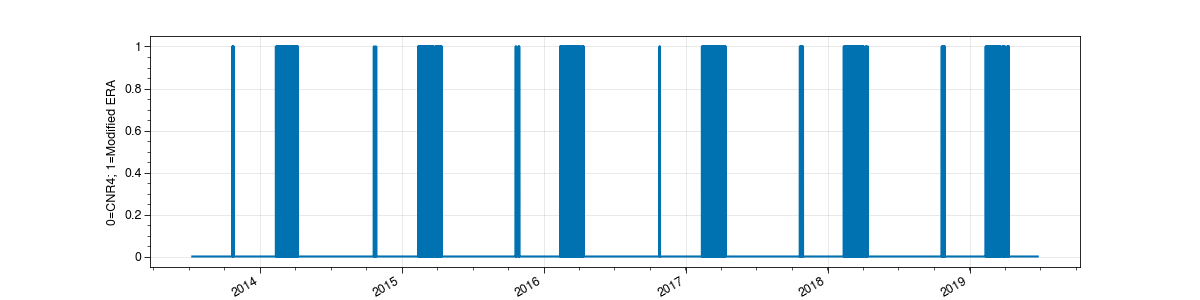

In [12]:
%matplotlib widget
ds['0=CNR4; 1=Modified ERA'].plot(figsize=(12,3))

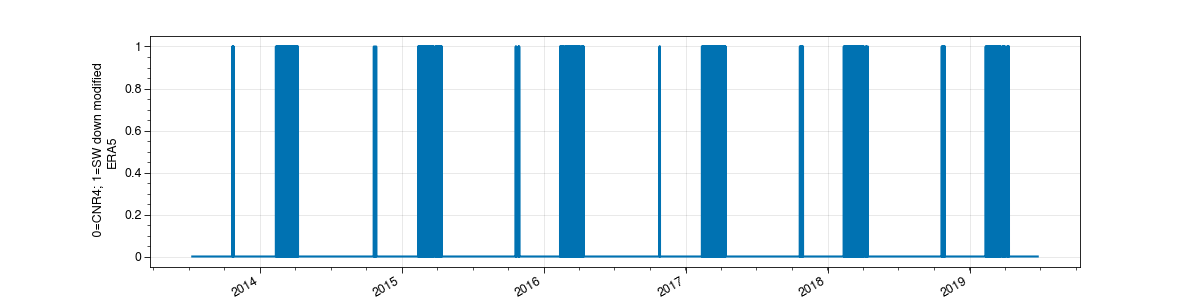

In [14]:
%matplotlib widget
ds_val[' 0=CNR4; 1=SW down modified ERA5'].plot(figsize=(12,3))

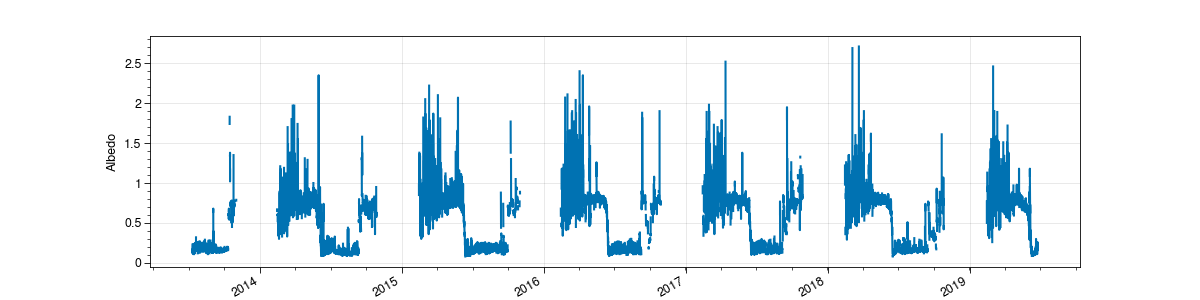

In [15]:
%matplotlib widget
ds_val['Albedo'].plot(figsize=(12,3))

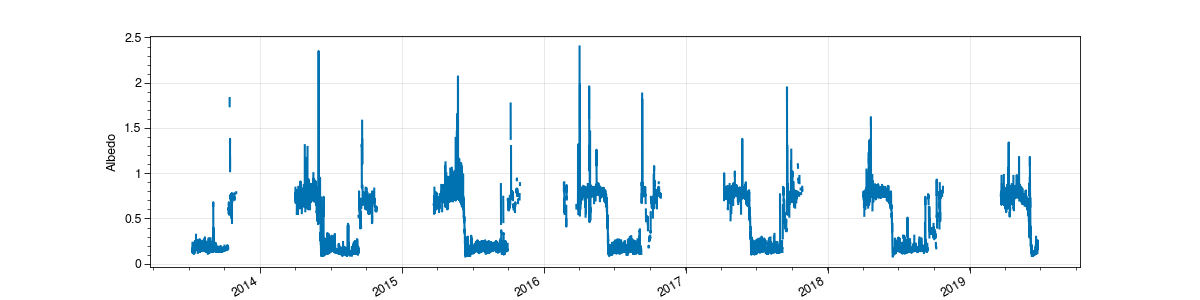

In [16]:
%matplotlib widget
ds_val['Albedo'].where(ds_val[' 0=CNR4; 1=SW down modified ERA5'] == 0).plot(figsize=(12,3))

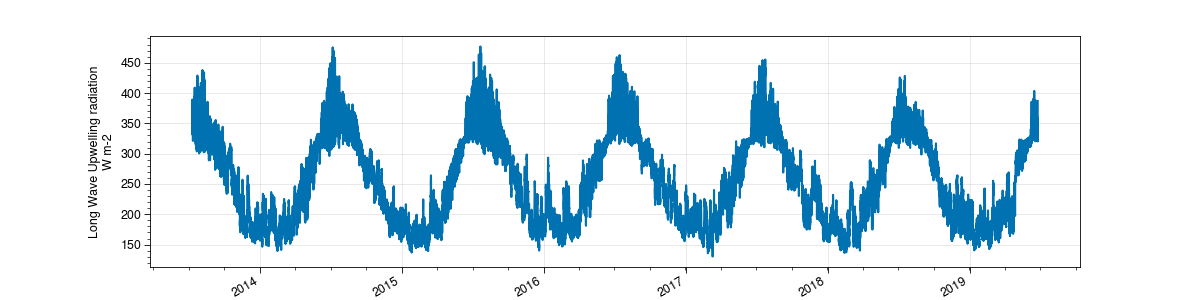

In [17]:
%matplotlib widget
ds_val['Long Wave Upwelling radiation W m-2'].plot(figsize=(12,3))

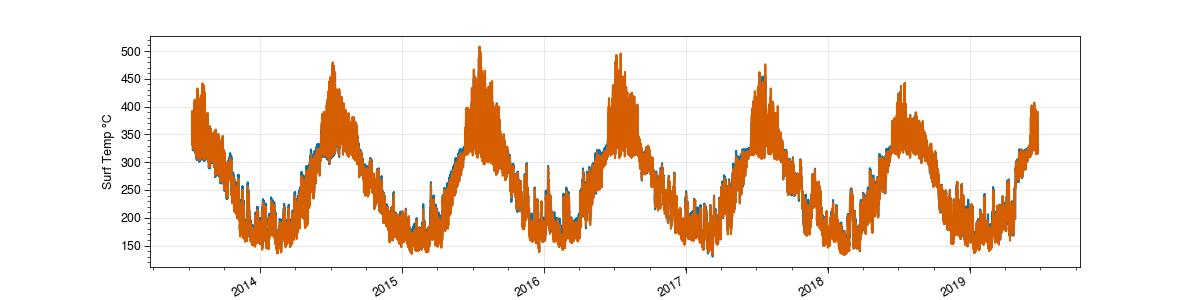

In [21]:
%matplotlib widget
ds_val['Long Wave Upwelling radiation W m-2'].plot(figsize=(12,3))
(5.670*1e-8*(ds_val['Surf Temp °C']+273.15)**4).plot()

In [9]:
path_val = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all'
df_val = pd.read_csv(path+'/Bylot/Bylot_validation_snow_soil_radiationV2.csv', sep=';', parse_dates=['Date'], index_col=['Date'])
ds_val = df_val.to_xarray()
df_val

,Snow depth m,Long Wave Upwelling radiation W m-2,0=CNR4; 1=From IR120,Short Wave Upwelling radiation W m-2,Albedo,0=CNR4; 1=SW down modified ERA5,Surf Temp °C,Soil volume water content -2 cm,Soil volume water content -5 cm,Soil volume water content -10 cm,...,Snow Temp. 2 cm,Snow Temp. 7 cm,Snow Temp. 17 cm,Snow Temp. 27 cm,Snow Temp. 37 cm,Snow Temp. 0 cm,Snow Temp. 5 cm,Snow Temp. 15 cm,Snow Temp. 25 cm,Snow Temp. 35 cm
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-11 09:00:00,0.0,360.466,1,41.77,0.16,0,9.860,0.200,0.444,0.578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-11 10:00:00,0.0,363.327,1,48.95,0.15,0,10.420,0.200,0.444,0.578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-11 11:00:00,0.0,379.107,1,117.04,0.17,0,13.450,0.200,0.444,0.578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-11 12:00:00,0.0,382.611,1,61.99,0.16,0,14.110,0.200,0.443,0.577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-11 13:00:00,0.0,379.318,1,62.44,0.16,0,13.490,0.199,0.443,0.577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-25 06:00:00,0.0,353.890,0,65.82,0.18,0,5.314,0.247,0.394,0.288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-25 07:00:00,0.0,363.160,0,72.48,0.16,0,9.260,0.247,0.394,0.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-25 08:00:00,0.0,374.220,0,89.61,0.17,0,10.710,0.246,0.393,0.284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert to SnowMIP format

In [140]:
df_forcing = df.copy()

df_forcing.index.names = ['time']

df_forcing.rename(
    columns={
        'WindSpeed m/s': 'Wind', 
        'Air Temp. °C': 'Tair', 
        'Specific humidity g/kg': 'Qair', # to change in kg/kg (as expected by CLASSIC)
        'Long Wave Downwell. CNR4 W m-2': 'LWdown',
        'Short Wave downwell. CNR4 W m-2': 'SWdown',
        'Pressure kPa': 'Psurf', # to change in Pa (as expected by CLASSIC)
        'Precip. Rain': 'Rainf', # to change in kg m^{-2) s^{-1)
        'Precip. Snow': 'Snowf', # to change in kg m^{-2) s^{-1)
    }, 
    inplace=True
)

# However, since some ERA5 values were probably underestimated, this resulted in some albedo values > 1, which is not 
# consistent with a sound radiation budget. Some data users may decide to modify some of the ERA5-derived SW↓ values 
# presented here to ensure a reasonable albedo value, probably around 0.8.

df_forcing.drop(
    columns=[
        '0=Data; 1=Gap-filled', 
        'Relative Humidity',
        'Long Wave Downwell. ERA5 W m-2',
        'Short Wave downwell. ERA5 W m-2',
        'Precip. Total  mm/h',
        'Precip  season cumul'  
    ], 
    inplace=True
)

# To remove this column that appear twice: '0=CNR4; 1=Modified ERA'
df_forcing = df_forcing.drop(df_forcing.columns[4], axis=1)
df_forcing = df_forcing.drop(df_forcing.columns[5], axis=1)

df_forcing.Qair = df_forcing.Qair*1e-3 # g/kg -> kg/kg (as expected by CLASSIC)
df_forcing.Psurf = df_forcing.Psurf*1e3 # kPa -> Pa (as expected by CLASSIC)
df_forcing.Rainf = df_forcing.Rainf/3600 # mm/h -> mm/s (as expected by CLASSIC)
df_forcing.Snowf = df_forcing.Snowf/3600 # mm/h -> mm/s (as expected by CLASSIC)

df_forcing

,Wind,Tair,Qair,LWdown,SWdown,Psurf,Rainf,Snowf
time,,,,,,,,
2013-07-11 09:00:00,1.530,6.819953,0.005626,308.859,250.90,100188.5431,0.0,0.0
2013-07-11 10:00:00,1.405,6.957644,0.005559,299.669,310.49,100198.5431,0.0,0.0
2013-07-11 11:00:00,2.021,8.925269,0.006426,289.596,672.70,100198.5431,0.0,0.0
2013-07-11 12:00:00,2.559,10.422386,0.007059,280.483,370.67,100198.5431,0.0,0.0
2013-07-11 13:00:00,2.749,8.218802,0.006003,283.789,372.92,100198.5431,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-06-25 06:00:00,0.713,11.119000,0.005216,245.120,343.93,101345.0000,0.0,0.0
2019-06-25 07:00:00,0.908,10.895000,0.005167,259.830,419.45,101390.0000,0.0,0.0
2019-06-25 08:00:00,2.065,10.744000,0.004980,251.450,516.75,101440.0000,0.0,0.0


In [152]:
ds_forcing = df_forcing.to_xarray()
ds_forcing

<xarray.Dataset>
Dimensions:  (time: 52202)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Data variables:
    Wind     (time) float64 1.53 1.405 2.021 2.559 ... 0.908 2.065 1.45 1.135
    Tair     (time) float64 6.82 6.958 8.925 10.42 ... 10.89 10.74 10.43 9.186
    Qair     (time) float64 0.005626 0.005559 0.006426 ... 0.004952 0.004424
    LWdown   (time) float64 308.9 299.7 289.6 280.5 ... 259.8 251.4 253.9 257.9
    SWdown   (time) float64 250.9 310.5 672.7 370.7 ... 419.4 516.8 580.8 679.0
    Psurf    (time) float64 1.002e+05 1.002e+05 ... 1.015e+05 1.015e+05
    Rainf    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    Snowf    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

In [142]:
ds_forcing_ex = xr.open_dataset(path+'/met_insitu_sap_2005_2015.nc')
ds_forcing_ex

<xarray.Dataset>
Dimensions:  (time: 87648)
Coordinates:
  * time     (time) datetime64[ns] 2005-10-01T01:00:00 ... 2015-10-01
Data variables:
    LWdown   (time) float32 ...
    Psurf    (time) float32 ...
    Qair     (time) float32 ...
    Rainf    (time) float32 ...
    Snowf    (time) float32 ...
    SWdown   (time) float32 ...
    Tair     (time) float32 ...
    Wind     (time) float32 ...

In [154]:
# Set the variables attributes as in SnowMIP
for var in list(ds_forcing.keys()):
    ds_forcing[var].attrs = ds_forcing_ex[var].attrs

# Only modify the temperature unit already prepared for CLASSIC inputs
ds_forcing['Tair'].attrs['units'] = '°C'
ds_forcing.to_netcdf(path+'/Bylot/met_insitu_byl_2013_2019.nc')
ds_forcing

<xarray.Dataset>
Dimensions:  (time: 52202)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Data variables:
    Wind     (time) float64 1.53 1.405 2.021 2.559 ... 0.908 2.065 1.45 1.135
    Tair     (time) float64 6.82 6.958 8.925 10.42 ... 10.89 10.74 10.43 9.186
    Qair     (time) float64 0.005626 0.005559 0.006426 ... 0.004952 0.004424
    LWdown   (time) float64 308.9 299.7 289.6 280.5 ... 259.8 251.4 253.9 257.9
    SWdown   (time) float64 250.9 310.5 672.7 370.7 ... 419.4 516.8 580.8 679.0
    Psurf    (time) float64 1.002e+05 1.002e+05 ... 1.015e+05 1.015e+05
    Rainf    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    Snowf    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

### SWdown

In [100]:
ds_forcing.SWdown

<xarray.DataArray 'SWdown' (time: 52202)>
array([250.9 , 310.49, 672.7 , ..., 516.75, 580.81, 679.  ])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  SWdown
    CMIP_name:  rsds
    long_name:  Surface downward shortwave radiation
    units:      W/m2

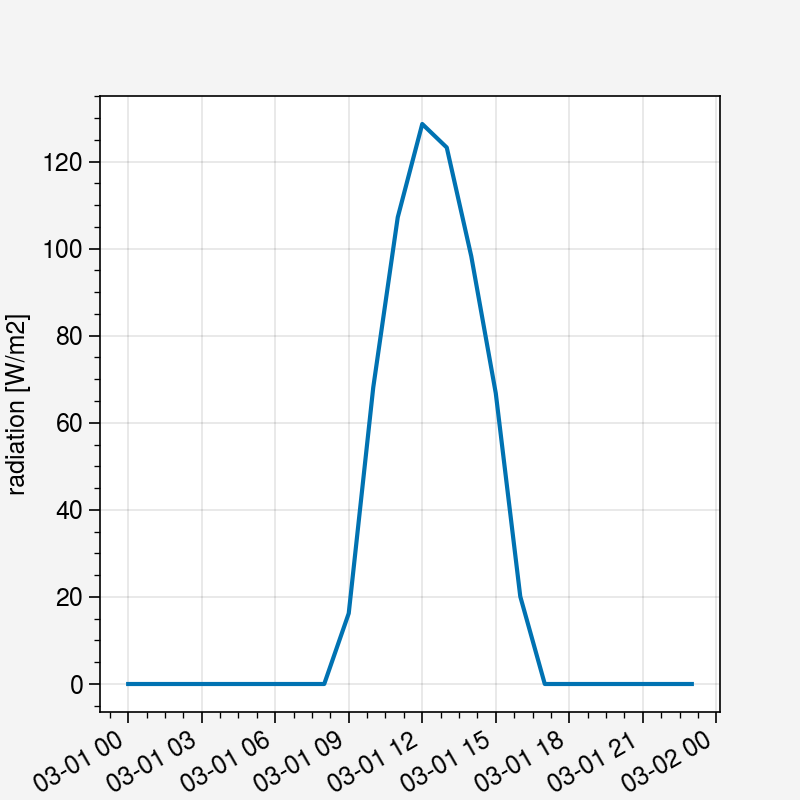

In [105]:
# Local time?
ds_forcing.SWdown.sel(time='2016-03-01').plot()

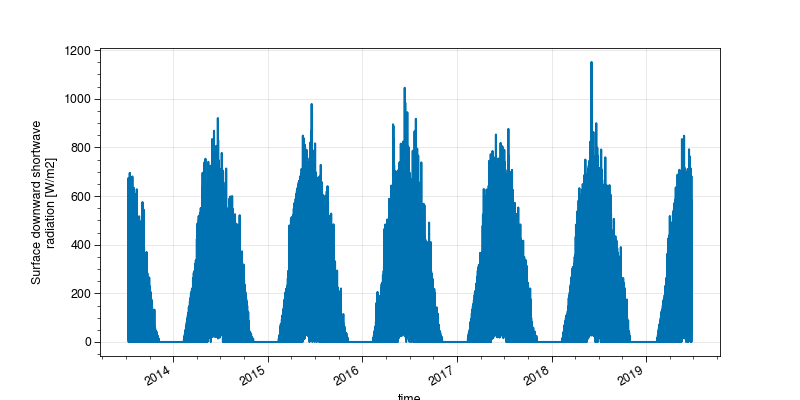

In [106]:
%matplotlib widget
ds_forcing.SWdown.plot(figsize=(8,4))

### LWdown

In [107]:
ds_forcing.LWdown

<xarray.DataArray 'LWdown' (time: 52202)>
array([308.859, 299.669, 289.596, ..., 251.45 , 253.88 , 257.89 ])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  LWdown
    CMIP_name:  rlds
    long_name:  Surface downward longwave radiation
    units:      W/m2

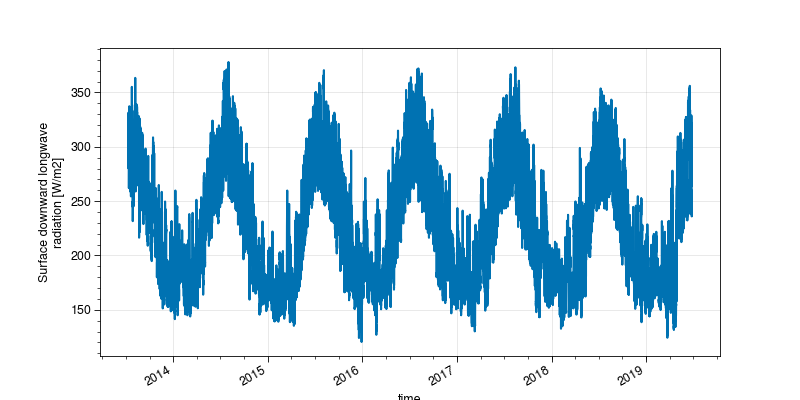

In [108]:
%matplotlib widget
ds_forcing.LWdown.plot(figsize=(8,4))

### Rainf

In [109]:
ds_forcing.Rainf

<xarray.DataArray 'Rainf' (time: 52202)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  Rainf
    CMIP_name:  prra
    long_name:  Rainfall rate
    units:      kg/m2/s

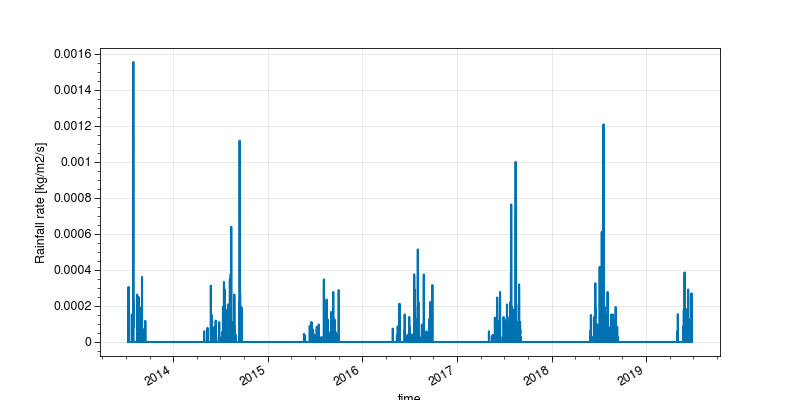

In [117]:
%matplotlib widget
ds_forcing.Rainf.plot(figsize=(8,4))

### Snowf

In [118]:
ds_forcing.Snowf

<xarray.DataArray 'Snowf' (time: 52202)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  Snowf
    CMIP_name:  prsn
    long_name:  Snowfall rate
    units:      kg/m2/s

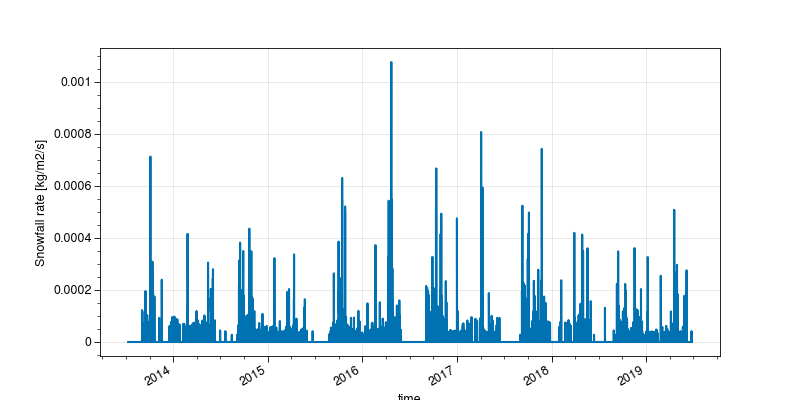

In [119]:
%matplotlib widget
ds_forcing.Snowf.plot(figsize=(8,4))

### Tair

In [121]:
ds_forcing.Tair

<xarray.DataArray 'Tair' (time: 52202)>
array([ 6.8199535 ,  6.95764435,  8.92526895, ..., 10.744     ,
       10.433     ,  9.186     ])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  Tair
    CMIP_name:  ta
    long_name:  Near-surface air temperature
    units:      °C

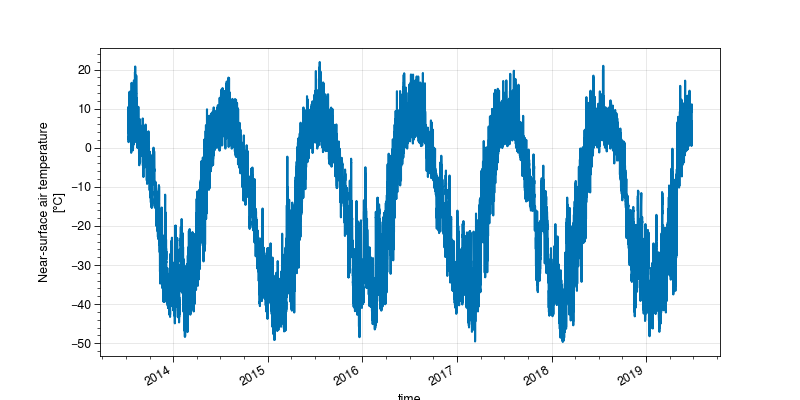

In [122]:
%matplotlib widget
ds_forcing.Tair.plot(figsize=(8,4))

### Qair

In [143]:
ds_forcing.Qair

<xarray.DataArray 'Qair' (time: 52202)>
array([0.0056257, 0.0055593, 0.0064263, ..., 0.0049798, 0.0049524,
       0.0044241])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00

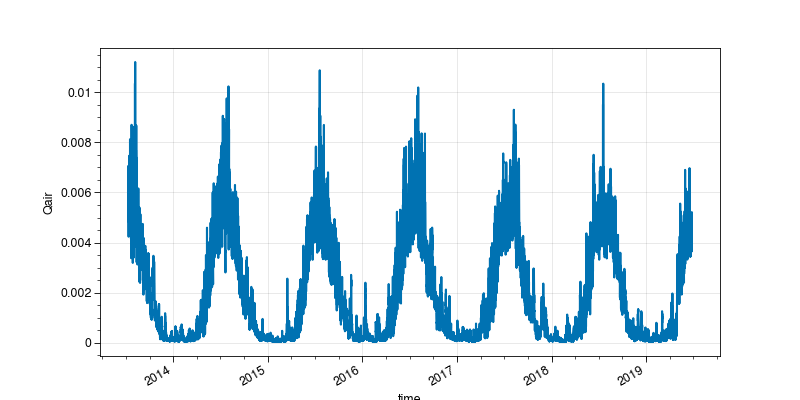

In [144]:
%matplotlib widget
ds_forcing.Qair.plot(figsize=(8,4))

### Wind

In [145]:
ds_forcing.Wind

<xarray.DataArray 'Wind' (time: 52202)>
array([1.53 , 1.405, 2.021, ..., 2.065, 1.45 , 1.135])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00

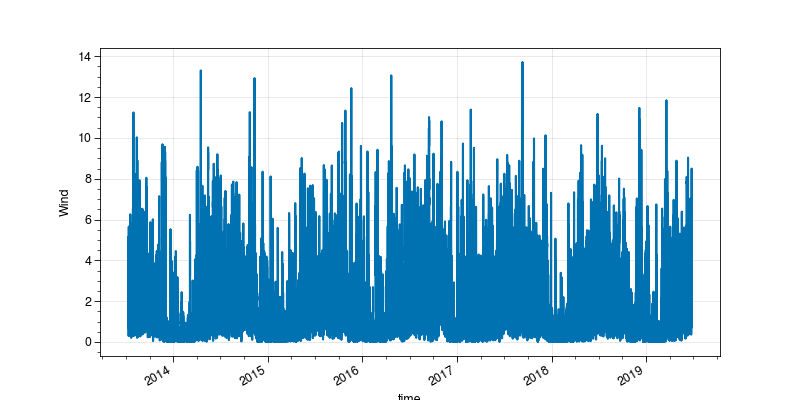

In [146]:
%matplotlib widget
ds_forcing.Wind.plot(figsize=(8,4))

### Psurf

In [147]:
ds_forcing.Psurf

<xarray.DataArray 'Psurf' (time: 52202)>
array([100188.5431, 100198.5431, 100198.5431, ..., 101440.    ,
       101495.    , 101535.    ])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00

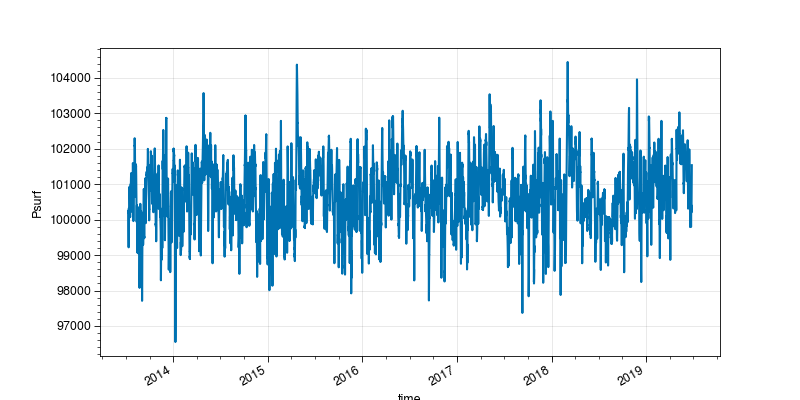

In [148]:
%matplotlib widget
ds_forcing.Psurf.plot(figsize=(8,4))